Lo siguiente está basado en el libro de B. Rumbos, Pensando Antes de Actuar: Fundamentos de Elección Racional, 2009 y de G. J. Kerns, Introduction to Probability and Statistics Using R, 2014.

El libro de G. J. Kerns tiene github: [jkerns/IPSUR](https://github.com/gjkerns/IPSUR)

**Notas:**

* Se utilizará el paquete *prob* de *R* para los experimentos descritos en la nota y aunque con funciones nativas de *R* se pueden crear los experimentos, se le da preferencia a mostrar cómo en *R* se tienen paquetes para muchas aplicaciones.

* En algunas líneas no es necesario colocar `print` y sólo se ha realizado para mostrar los resultados de las funciones en un formato similar al de R pues la nota se escribió con *jupyterlab* y *R*.

* Cuidado al utilizar las funciones del paquete *prob* para construir espacios de probabilidad grandes como lanzar un dado 9 veces... (tal experimento tiene 10 millones de posibles resultados)

In [1]:
options(repr.plot.width=4, repr.plot.height=4) #esta línea sólo se ejecuta para jupyterlab con R

In [2]:
library(prob)
library(ggplot2)

Loading required package: combinat

Attaching package: 'combinat'

The following object is masked from 'package:utils':

    combn

Loading required package: fAsianOptions
Loading required package: timeDate
Loading required package: timeSeries
Loading required package: fBasics
Loading required package: fOptions

Attaching package: 'prob'

The following objects are masked from 'package:base':

    intersect, setdiff, union



# Ejemplos

1) Supongamos que nos hacen la siguiente pregunta: ¿cuál es la probabilidad de obtener un $6$ si lanzamos un dado? La respuesta es simple, si $E$ es el evento {obtener $6$} entonces la probabilidad de obtener un $6$ es: $P(E) = \frac{1}{6}$. Si la pregunta es ¿cuál es la probabilidad de obtener un $6$ dado que el número es par? La respuesta cambia pues ahora el espacio muestral se reduce a $\{2,4,6\}$ y si $F$ es el evento {número par} entonces la probabilidad de tener un $6$ dado que el número es par se denota por: $P(E|F)$ y en este caso es igual a: $P(E|F) = \frac{1}{3}$.

2) Considérese una baraja y los eventos: $E=${primer carta extraída es as} y $F$={segunda carta extraída es as}. Calcular las probabilidades $P(E)$, $P(F|E)$ y $P(F|E^c)$.

3) Iguales enunciados que 1 y 2 pero calcúlese $P(E \cap F)$ en ambos casos.

**Solución:**

1) $P(E\cap F)$ puede pensarse como un producto de probabilidades que involucran los eventos {obtener $6$} y {el número es par dado que se obtuvo $6$}: $P(E)P(F|E) = \frac{1}{6} \cdot 1$ o bien como el producto $P(F)P(E|F) = \frac{3}{6} \cdot \frac{1}{3}$ {obtener par} y {obtener $6$ dado que se tiene un número par}.

2) $P(E \cap F)$ se puede calcular como:

a) $P(E|F)P(F)$ con eventos en cada probabilidad: $E|F =${primer carta extraída es as dado que se extrajo una segunda carta que es as}, $F=${segunda carta extraída es as}.


In [3]:
3/51*4/52

[1] 0.004524887

b) $P(F|E)P(E)$ con eventos en cada probabilidad: $F|E=$ {segunda carta extraída es as dado que se extrajo una primer carta que es as}, $E=${primer carta extraída es as}.

In [4]:
3/51*4/52

[1] 0.004524887

# Probabilidad condicional

La probabilidad condicional de $F$ dado $E$ se denota como $P(F|E)$ y está definida por:

$$P(F|E) = \frac{P(F \cap E)}{P(E)}, \quad \text{ si } P(E)>0.$$

**Obs:** obsérvese como en los ejemplos anteriores que a partir de esta igualdad se tiene: $P(F \cap E) = P(F|E)P(E)$ si $P(E)>0$.

## Ejemplos

1) **Experimento:** lanzar dos veces una moneda. Sean $E=${sale sol}, $F=${sale sol y águila}. Calcular $P(E), P(F), P(E\cap F), P(E|F), P(F|E)$.

2) **Experimento:** se lanzan dos dados y nos dicen que la suma de los números que se obtuvieron es 7. ¿Cuál es la probabilidad de que los números obtenidos sean 5 y 2? 


### En R ...

**Experimento:** lanzamiento de dos dados de 6 lados. Sean $E=${resultados de ambos dados conciden}, $F=${suma de los resultados es al menos 8}. Calcular $P(E), P(F), P(E\cap F), P(E|F), P(F|E)$.

**Solución:** El espacio de resultados se puede representar como una matriz pues el espacio de resultados es: $S=\{(1,1),(1,2),\dots,(6,6)\}$ y $\#(S)=36$.

In [5]:
S<-rolldie(2)
E<-subset(S, X1 == X2)
F<-subset(S, X1+X2>=8)

In [6]:
E$etiqueta <- rep('X', nrow(E))
F$etiqueta <- rep('O', nrow(F))

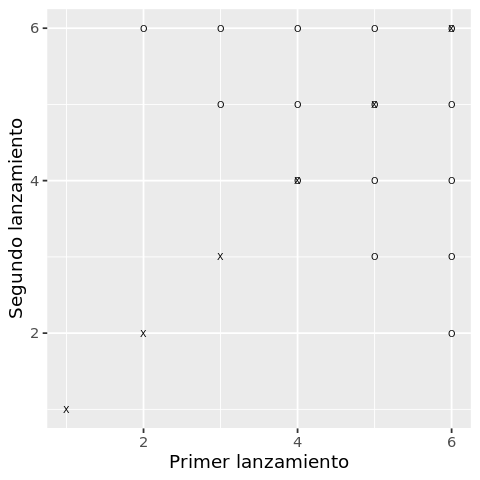

In [7]:
graf <- ggplot(rbind(E, F), aes(x=X1, y=X2, label=etiqueta)) #obsérvese que se puede asignar
                                                             #el resultado al objeto "graf"
                                                             #aes nos ayuda a mapear variables
                                                             #a objetos en la gráfica

graf + geom_text(size = 2) + xlab("Primer lanzamiento") + ylab("Segundo lanzamiento")
                                                            #con el '+' añadimos capas a la
                                                            #gráfica

Entonces: $P(E) = \frac{6}{36}$, $P(F)=\frac{15}{36}$, $P(E \cap F) =\frac{3}{36}$, $P(E|F) = \frac{3}{15}$, $P(F|E)=\frac{3}{6}$.

**Otra opción podría ser:**

In [8]:
S <- rolldie(2, makespace = TRUE)  # se asume el modelo equiprobable

In [9]:
head(S)

X1,X2,probs
<int>,<int>,<dbl>
1,1,0.02777778
2,1,0.02777778
3,1,0.02777778
4,1,0.02777778
5,1,0.02777778
6,1,0.02777778


In [10]:
#Eventos
E <- subset(S, X1 == X2)
F <- subset(S, X1 + X2 >= 8)
Prob(E, given = F) #también podría haberse calculado: Prob(S, X1==X2, given = (X1 + X2 >= 8))
                   #si se hace referencia al mismo S
Prob(F, given = E) #también podría haberse calculado: Prob(S, X1+X2 >= 8, given = (X1==X2))
                   #si se hace referencia al mismo S

[1] 0.2

[1] 0.5

## Propiedades y reglas

Las probabilidades condicionales se comportan como probabilidades sin condicionar:

Para cualquier evento $E$ fijo con $P(E)>0$ se tiene:

1) $P(F|E) \geq 0$, para todos los eventos $F \in S$.

2) $P(S|E) = 1$.

3) Si los eventos $F_1, F_2, F_3, \dots $ son ajenos entonces:

$P(\displaystyle \cup_{i=1}^n F_i | E ) =  \sum_{i=1}^nP(F_i | E)$ para toda $n$ y aún más: $P(\displaystyle \cup_{i=1}^\infty F_i| E ) = \sum_{i=1}^\infty P(F_i|E)$

Y se tienen las siguientes propiedades:

1)  $P(F^c | E) = 1-P(F|E)$.

2) Si $F \subset G$ entonces $P(F|E) \leq P(G|E)$.

3) $P(F \cup G|E) = P(F|E) + P(G|E) - P(F \cap G|E)$ 

4) La **regla de la multiplicación** para cualquier par de eventos $E, F$: $P(E \cap F) = P(E|F)P(F) = P(F|E)P(E)$ y en general: $P(\displaystyle \cap_{i=1}^n E_i) = P(E_1)P(E_2|E_1)P(E_3|E_1 \cap E_2) \cdots P(E_n |\displaystyle \cap_{i=1}^{n-1} E_i)$

### Ejemplos de la regla de la multiplicación


1)**Problema:** calcular la probabilidad de extraer $2$ aces de una baraja.

**Solución:**

Si $E=${extraer un as} y $F=${extraer un as} entonces $P(E\cap F)=P(E|F)P(F) = \frac{3}{51} \cdot \frac{4}{52}  \approx 0.00452$

#### En R ...

In [11]:
L <- cards() #Es un dataframe
head(L)

rank,suit
<fct>,<fct>
2,Club
3,Club
4,Club
5,Club
6,Club
7,Club


In [12]:
M <- urnsamples(L, size = 2, replace=F, ordered = F) #extraer dos canicas
                                                     #sin reemplazo y sin orden
N <- probspace(M) #modelo equiprobable

$M$ es una lista de una dimensión que contiene todas las combinaciones posibles de pares de renglones del data frame $L$. La cantidad de combinaciones de pares de renglones es $\binom{52}{2}:$

In [13]:
NCOL(M)

[1] 1

In [14]:
NROW(M)

[1] 1326

In [15]:
choose(52,2)

[1] 1326

In [16]:
head(M)

[[1]]
  rank suit
1    2 Club
2    3 Club

[[2]]
  rank suit
1    2 Club
3    4 Club

[[3]]
  rank suit
1    2 Club
4    5 Club

[[4]]
  rank suit
1    2 Club
5    6 Club

[[5]]
  rank suit
1    2 Club
6    7 Club

[[6]]
  rank suit
1    2 Club
7    8 Club

$N$ es una lista de dimensión igual a dos, se utiliza `attributes` para revisar sus `names`: 

In [17]:
print(attributes(N))

$names
[1] "outcomes" "probs"   

$class
[1] "ps"   "list"



In [18]:
print(attributes(N)$names) #dos dimensiones

[1] "outcomes" "probs"   


En la primer dimensión tiene $\binom{52}{2} = 1326$ data frames y cada data frame tiene 2 renglones:

In [19]:
length(N$outcomes)

[1] 1326

In [20]:
N$outcomes[1]

rank,suit
<fct>,<fct>
2,Club
3,Club


In [21]:
N$outcomes[100]

,rank,suit
,<fct>,<fct>
2,3,Club
51,K,Spade


Cada renglón representa el par de cartas elegidas.

La segunda dimensión tiene $\binom{52}{2} = 1326$ probabilidades:

In [22]:
length(N$probs)

[1] 1326

cada probabilidad igual a $\frac{1}{\binom{52}{2}}$ que es la probabilidad de extraer dos cartas cualesquiera.

In [23]:
N$probs[1]

[1] 0.0007541478

In [24]:
N$probs[100]

[1] 0.0007541478

In [25]:
1/choose(52,2)

[1] 0.0007541478

Y la probabilidad deseada: $P(E\cap F) = P(${extraer dos aces}$)$ es:

In [26]:
Prob(N, all(rank == 'A')) #Prob asume modelo equiprobable
                          # el evento es all(rank == 'A') y como son dos cartas extraídas, 
                          #entonces ambas deben ser iguales a A

[1] 0.004524887

2) **Problema:** considérese una urna con $10$ canicas: $7$ son rojas y $3$ son verdes y se seleccionan $3$ canicas. Sea $E=${primer canica es roja}, $F=${segunda canica es roja} y $G=${tercera canica es roja}. Calcular $P(E \cap F \cap G)$.

**Solución:**

$P(E\cap F\cap G) = \frac{\binom{7}{3}}{\binom{10}{3}}$

In [27]:
choose(7,3)/choose(10,3)

[1] 0.2916667

#### En R ...

In [28]:
L <- rep(c("red","green"), times = c(7,3)) #urna, es un vector
print(L)

 [1] "red"   "red"   "red"   "red"   "red"   "red"   "red"   "green" "green"
[10] "green"


In [29]:
M <- urnsamples(L, size = 3, replace = FALSE, ordered = TRUE) #data frame, espacio de resultados

In [30]:
NROW(M)

[1] 720

In [31]:
NCOL(M)

[1] 3

In [32]:
M[35:40,]

,X1,X2,X3
,<fct>,<fct>,<fct>
35,red,green,red
36,red,red,green
37,red,red,green
38,red,green,red
39,green,red,red
40,green,red,red


In [33]:
N <- probspace(M) #a cada renglón de M (outcomes) se le asocia un vector de probabilidades
                  #con lo que se tiene un data frame: N, que es un espacio de probabilidad
                  #probspace usa modelo equiprobable

In [34]:
NROW(N)

[1] 720

In [35]:
NCOL(N)

[1] 4

In [36]:
Prob(N, isrep(N, vals='red', nrep=3))# equivalente hacer: 
                                     #Prob(N, X1 =='red'& X2 =='red' & X3 =='red')
                                     #y se calculó: sum(N[with(N,isrep(N, 'red', 3)),]$probs)

[1] 0.2916667

`isrep` es una función del paquete `prob`

**Ejercicio: calcular la probabilidad de:**

* extraer dos canicas rojas

* extraer roja, verde, roja (en este orden)

* extraer roja, verde, roja (no importa el orden)

## Ejercicios

1) Supongamos que en una muestra de 100 personas, 65 de ellas son vacunadas contra la influenza esta temporada de invierno. Cinco de las personas vacunadas contraen la enfermedad. De las 35 personas que no son vacunadas 25 caen enfermas. La siguiente tabla resume esta información:

|----|enfermo|no enfermo|Total|
|:---:|:---:|:---:|:---:|
|vacunados|5|60|65|
|no vacunados|25|10|35|
|Total|30|70|100

Calcular:

a) $P(${vacunado}$)$, $P(${no vacunado}$)$, $P(${enfermo|vacunado}$)$, $P(${no enfermo|vacunado}$)$, $P(${enfermo|no vacunado}$)$, $P(${no enfermo|no vacunado}$)$ y $P(${vacunado y no enfermo}$)$. 

b)$P(${no vacunado y no enfermo}$)$, $P(${no enfermo}$)$

c)$P(${vacunado} | {no enfermo}$)$.



2) Considérese dos urnas, la primera tiene $5$ canicas rojas y $3$ canicas verdes y la segunda $2$ canicas rojas y $6$ verdes. Una persona selecciona una canica de la primer urna y la transfiere a la segunda urna sin mostrarte qué color fue. Seleccionas una canica de la segunda urna. ¿Cuál es la probabilidad que la canica que seleccionaste es roja?. Sugerencia: considérese los eventos: $E=${la canica que se lleva de la primer urna a la segunda urna es roja} y $F=${la canica seleccionada es roja} y condicionar sobre $E$, lo que se pide es $P(F)$.

3) Considérese la siguiente tabla:


|Fuma/No Fuma|Femenino|Masculino|Suma
|:----:|:----:|:----:|:----:|
|No fuma|61|75|136
|Fuma|9|23|32
|Suma|70|98|168

Calcular:

a) $P(Femenino), P(Fuma)$.

b) Supóngase que una persona deja de fumar pero no se sabe su género. Si se selecciona una persona no fumadora aleatoriamente, calcular $P(Femenino)$. Sugerencia: piénsese este problema como el de tener dos urnas, cada urna con canicas rojas y verdes como en el ejercicio anterior. La urna 1 y la urna 2 representan fumar y  no fumar respectivamente y las canicas rojas y verdes representan Femenino y Masculino respectivamente. Además, considérese los eventos: $E=${mujer deja de fumar} y usar la regla de probabilidad total condicionando sobre $E$.